# Outliers detection

First, using the gaussian curve:

In [25]:
import warnings 
warnings.filterwarnings("ignore")

In [26]:
import pandas as pd

In [27]:
df = pd.read_csv("Nov2Temp.csv")
df

,high,low
0,58,25
1,26,11
2,53,24
3,60,37
4,67,42
...,...,...
113,119,33
114,127,27
115,18,38
116,15,51


<Axes: >

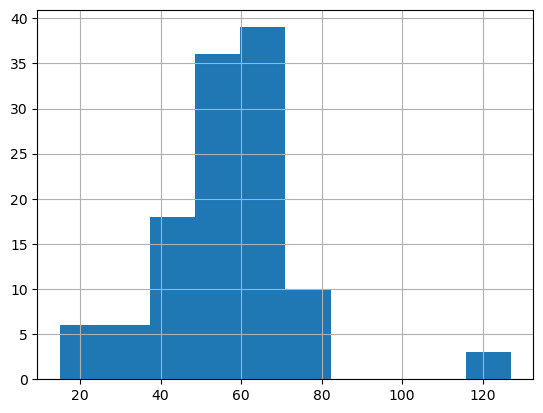

In [28]:
df["high"].hist()

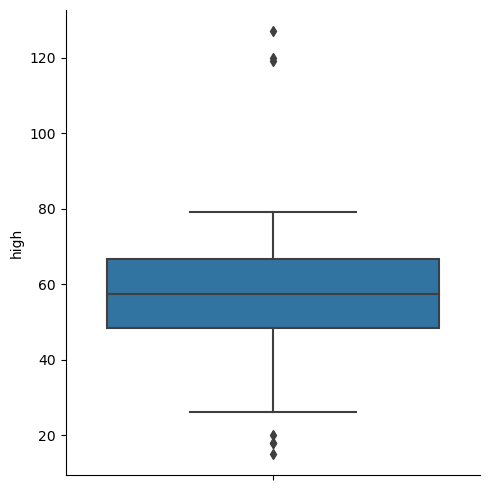

In [32]:
import seaborn as sns
sns.catplot(data = df, y = "high", kind = "box")

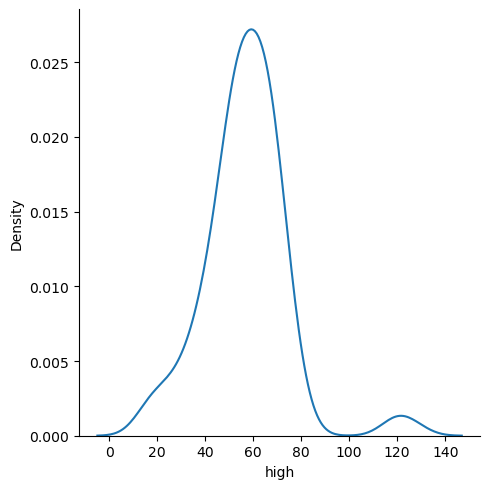

In [33]:
sns.displot(data = df, x = "high", kind = "kde")

So, the data resembles a normal distribution. That makes possible for us to make an analysis based on the normal distribution

In [34]:
condition = (df["high"] < (df["high"].mean() - 3 * df["high"].std())) | (df["high"] > (df["high"].mean() + 3 * df["high"].std()))

In [35]:
df[condition]

,high,low
112,120,37
113,119,33
114,127,27


In [36]:
df.drop(df[condition].index, inplace = True)

<Axes: >

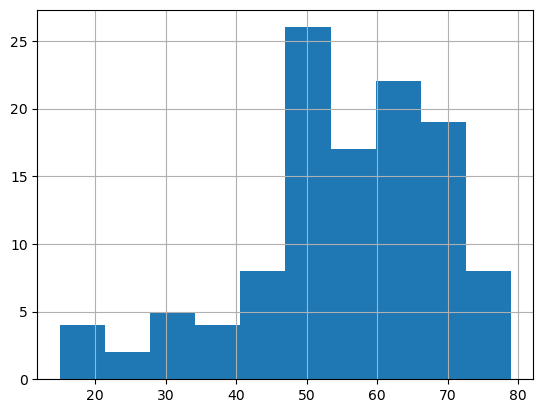

In [37]:
df["high"].hist()

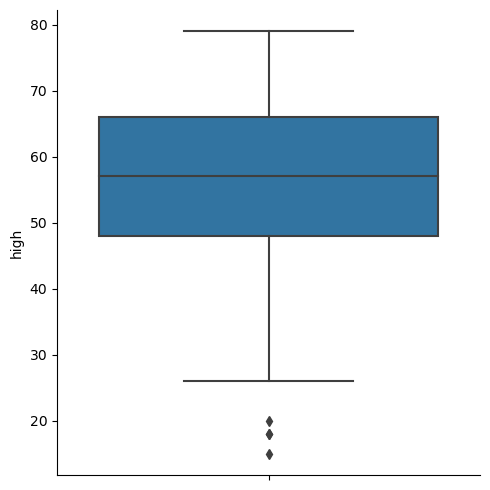

In [39]:
sns.catplot(data = df, y = "high", kind = "box")

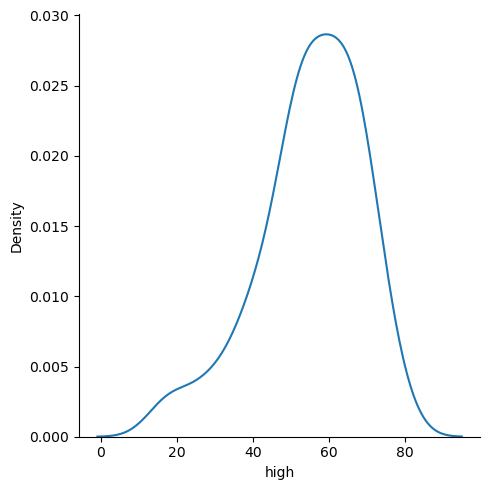

In [38]:
sns.displot(data = df, x = "high", kind = "kde")

In [24]:
df[condition]

,high,low


So, the outliers were removed!

Now, we are going to use the IQR:

In [40]:
df = pd.read_csv("Nov2Temp.csv")
df

,high,low
0,58,25
1,26,11
2,53,24
3,60,37
4,67,42
...,...,...
113,119,33
114,127,27
115,18,38
116,15,51


In [44]:
df.describe()

,high,low
count,118.000000,118.000000
mean,56.830508,29.262712
std,17.205796,12.877084
min,15.000000,-33.000000
25%,48.250000,24.000000
50%,57.500000,31.000000
75%,66.750000,36.750000
max,127.000000,54.000000


<Axes: >

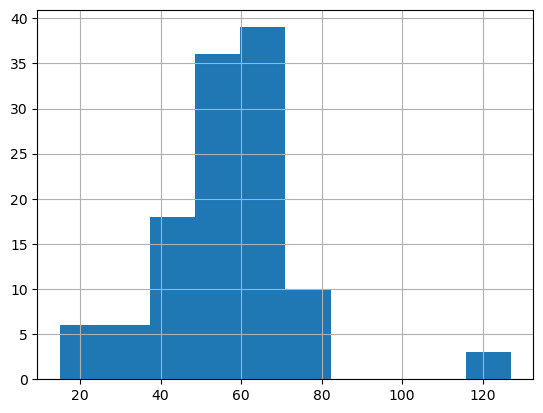

In [46]:
df["high"].hist()

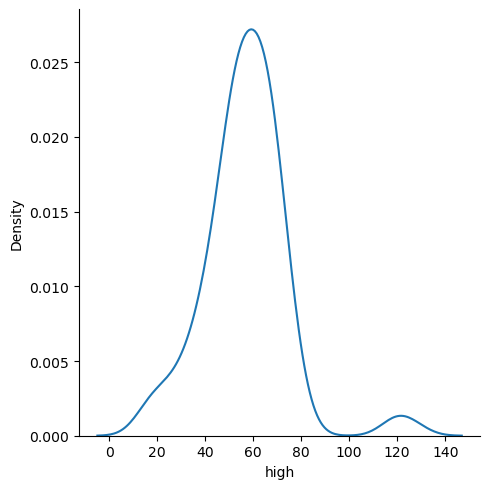

In [48]:
sns.displot(data = df, x = "high", kind = "kde")

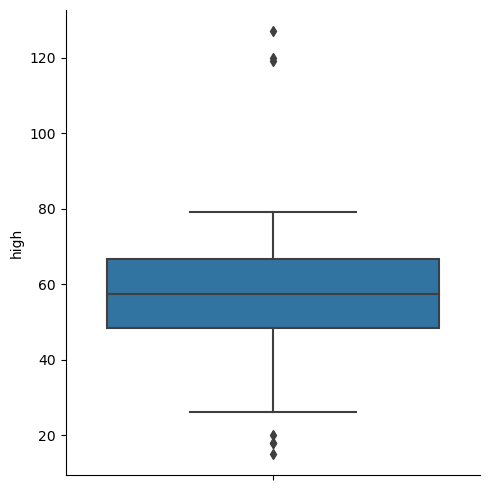

In [50]:
sns.catplot(data = df, y = "high", kind = "box")

In [41]:
IQR = df["high"].quantile(0.75) - df["high"].quantile(0.25)
condition = (df["high"] < (df["high"].quantile(0.25) - 1.5 * IQR)) | (df["high"] > (df["high"].quantile(0.75) + 1.5 * IQR))

In [52]:
df[condition]

,high,low
25,20,15
79,18,-1
112,120,37
113,119,33
114,127,27
115,18,38
116,15,51


In [53]:
df.drop(df[condition].index, inplace = True)

<Axes: >

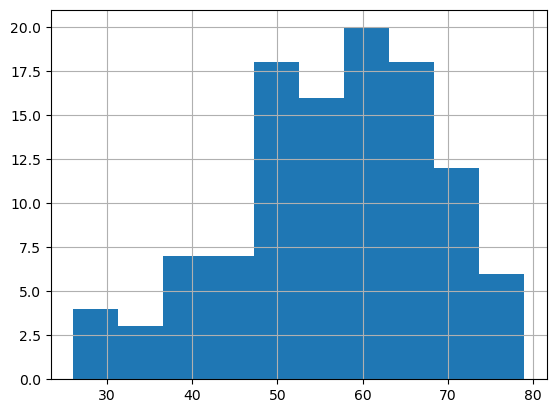

In [54]:
df["high"].hist()

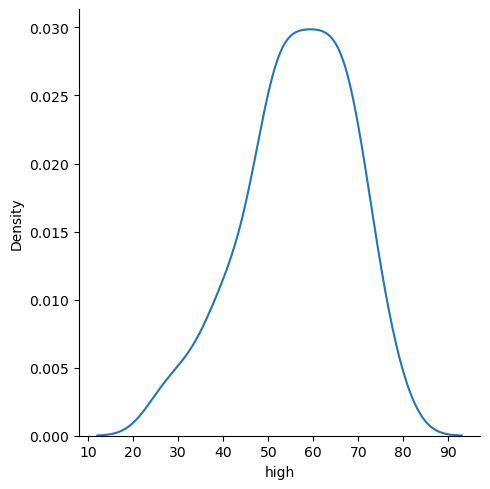

In [55]:
sns.displot(data = df, x = "high", kind = "kde")

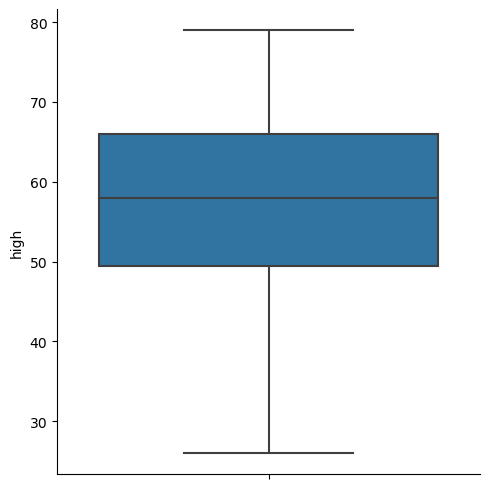

In [56]:
sns.catplot(data = df, y = "high", kind = "box")

In [57]:
df[condition]

,high,low


There it is! The outliers were removed!